In [ ]:
import numpy as np
import random
import copy
import statistics
import matplotlib.pyplot as plt

In [ ]:
N = 100

In [ ]:
all_errors = []
all_stds = []
for E in range(0, 60, 20):
  errors_different_R = []
  errors_different_R_std = []
  for R in range(10, 110, 10):
    errors = []
    for k in range(30):
      data = []
      for i in range(R):
        temp = []
        for j in range(N):
          if random.random() <= 0.5:
            temp.append(1)
          else:
            temp.append(-1)
        data.append(np.array(temp))
      data = np.array(data)
      W = -100 * np.eye(N)
      for index in range(R):
        s = data[index]
        W += np.dot(s.reshape(100, 1), np.transpose(s).reshape(1, 100))
      error = 0
      for index in range(R):
        s = copy.deepcopy(data[index])
        t = data[index]
        for i in range(100):
          if random.random() <= (E / 100):
            s[i] = s[i] * -1
        out = np.dot(s.reshape(1, 100), W)
        out = np.sign(out)[0]
        for i in range(100):
          if int(out[i]) != int(t[i]):
            error += 1
      errors.append(100 * R - error)
    errors_different_R.append((sum(errors) / 30) / (100 * R))
    errors_different_R_std.append(statistics.stdev(errors) / (100 * R))
  all_errors.append(errors_different_R)
  all_stds.append(errors_different_R_std)

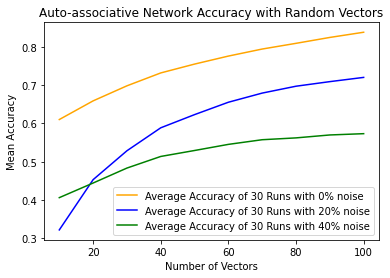

In [ ]:
X = [R for R in range(10, 110, 10)]
y1 = all_errors[0]
y2 = all_errors[1]
y3 = all_errors[2]
plt.plot(X, y1, color='orange', label='Average Accuracy of 30 Runs with 0% noise')
plt.plot(X, y2, color='b', label='Average Accuracy of 30 Runs with 20% noise')
plt.plot(X, y3, color='g', label='Average Accuracy of 30 Runs with 40% noise')
plt.xlabel("Number of Vectors")
plt.ylabel("Mean Accuracy")
plt.title("Auto-associative Network Accuracy with Random Vectors")
plt.legend(loc = 'best')
plt.show()

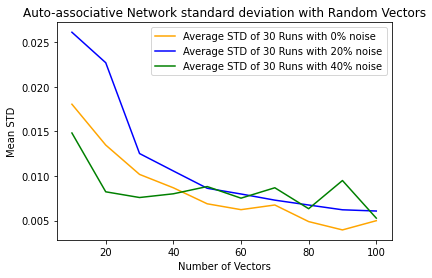

In [ ]:
X = [R for R in range(10, 110, 10)]
y1 = all_stds[0]
y2 = all_stds[1]
y3 = all_stds[2]
plt.plot(X, y1, color='orange', label='Average STD of 30 Runs with 0% noise')
plt.plot(X, y2, color='b', label='Average STD of 30 Runs with 20% noise')
plt.plot(X, y3, color='g', label='Average STD of 30 Runs with 40% noise')
plt.xlabel("Number of Vectors")
plt.ylabel("Mean STD")
plt.title("Auto-associative Network standard deviation with Random Vectors")
plt.legend(loc = 'best')
plt.show()